In [40]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from rfgap import RFGAP
from sklearn.utils import resample


In [41]:
#load dataset
iris_data = load_iris()
iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris['label'] = iris_data.target

In [42]:
#downsample 2 classes of iris so that the dataset is imbalanced
class_0 = iris[iris['label'] == 0]
class_1 = iris[iris['label'] == 1]
class_2 = iris[iris['label'] == 2]

class_0_downsampled = resample(class_0, replace=False, n_samples=20, random_state=42)
class_1_downsampled = resample(class_1, replace=False, n_samples=15, random_state=42)
class_2_downsampled = resample(class_2, replace=False, n_samples=50, random_state=42)

imbalanced_iris = pd.concat([class_0_downsampled, class_1_downsampled, class_2_downsampled])




In [43]:
x = imbalanced_iris.iloc[:, :-1]
y = imbalanced_iris.iloc[:, -1]

In [28]:
classCounts = y.value_counts()

majLabel = classCounts.index[0]
majCount = classCounts.iloc[0]

class1Label = classCounts.index[1]
class1Count = classCounts.iloc[1]
class1UpsampleSize = round(majCount - class1Count)

class2Label = classCounts.index[2]
class2Count = classCounts.iloc[2]
class2UpsampleSize = round(majCount - class2Count)

2 50 0 20 1 15


In [37]:
valueCounts = y.value_counts()
majLabel = valueCounts.index[0]
majCount = valueCounts.iloc[0]
classCounts = valueCounts.to_dict()
for label in classCounts:
    print(label, classCounts[label])
print(majCount - classCounts[1])


2 50
0 20
1 15
35


In [44]:
#Iris Example
def rfOverSample(x, y, numSamples=3):

    #Train RF:
    rf = RFGAP(y = y, prediction_type = 'classification')
    rf.fit(x, y)
    prox = rf.get_proximities().toarray()

    valueCounts = y.value_counts()
    majLabel = valueCounts.index[0]
    majCount = valueCounts.iloc[0]
    classCounts = valueCounts.to_dict()

    numFeatures = x.shape[1]

    # upsample_sizes = {}

    # for label, count in classCounts.items():
        

    # majLabel = classCounts.index[0]
    # majCount = classCounts.iloc[0]

    # class1Label = classCounts.index[1]
    # class1Count = classCounts.iloc[1]
    # class1UpsampleSize = round(majCount - class1Count)

    # class2Label = classCounts.index[2]
    # class2Count = classCounts.iloc[2]
    # class2UpsampleSize = round(majCount - class2Count)
    # prox = rf.get_proximities().toarray()


    for label in classCounts:
        if label != majLabel:
            upsampleSize = majCount - classCounts[label]
            newPoints = np.zeros((upsampleSize, numFeatures))
            for i in range(upsampleSize):
                sampleIndices = np.where(y == label)[0]
                samples = np.random.choice(sampleIndices, numSamples, replace=True)
                newFeatures = np.sum((np.matmul(np.transpose(x[samples,:]), prox[samples, :])), axis=1)/numSamples
                newPoints[i, : ] = newFeatures
            x = np.concatenate(x, newPoints)
            y = np.concatenate(y, np.ones_like(newPoints[ : , 0]) * label)
    
    return x, y

    # # For minority class 1:
    # class1NewPoints = np.zeros((class1UpsampleSize,4))
    # for i in range(class1UpsampleSize):
    #     sampleIndices = np.where(y == class1Label)[0]
    #     samp = np.random.choice(sampleIndices, numSamples, replace=True)
    #     newFeatures = np.sum((np.matmul(np.transpose(x[samp,:]), prox[samp, :])), axis=1)/numSamples
    #     class1NewPoints[i, : ] = newFeatures
    #     x = np.concatenate(x, class1NewPoints)
    #     y = np.concatenate(y, np.ones_like(class1NewPoints[:, 0]) * class1Label)
    
    # #for minority class 2:
    # class2NewPoints = np.zeros((class2UpsampleSize, 4))
    # for i in range(class2UpsampleSize):
    #     sampleIndices = np.where(y == class2Label)[0]
    #     samp = np.random.choice(sampleIndices, numSamples, replace=True)
    #     newFeatures = np.sum((np.matmul(np.transpose(x[samp,:]), prox[samp, :])), axis=1)/numSamples
    #     class2NewPoints[i, : ] = newFeatures
    #     x = np.concatenate(x, class2NewPoints)
    #     y = np.concatenate(y, np.ones_like(class2NewPoints[:, 0]) * class2Label)
    
    # return x, y
    
    """figure out how to combine new data points to original"""

In [45]:
x,y = rfOverSample(x, y)

InvalidIndexError: (array([12,  5, 10]), slice(None, None, None))

In [30]:
#using rfoversample function:
rf = RFGAP(y = y, prediction_type = 'classification')
rf.fit(x, y)
x, y = rfOverSample(x, y, numSamples=3, rf=rf)


In [13]:
rf = RFGAP(y = y, prediction_type = 'classification')

rf.fit(x, y)

prox = rf.get_proximities().toarray()



In [14]:
prox.size

22500

In [33]:
rf.predict(x.iloc[45:55, :])

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

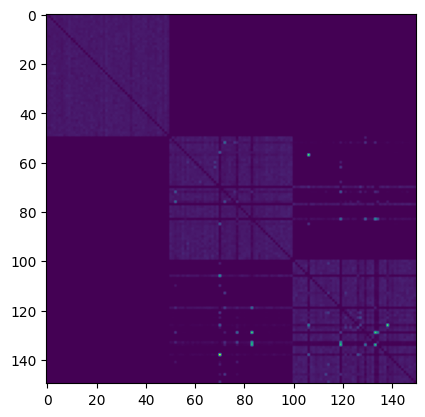

In [23]:
import matplotlib.pyplot as plt

plt.imshow(prox)